https://tproger.ru/translations/regular-expression-python/ - практическое применение регулярных выражений

https://ihateregex.io/ - поиск регулярных выражений

https://contrib.scikit-learn.org/category_encoders/ordinal.html - Порядковое кодирование библиотеки ordinal в классе OrdinalEncoder
https://contrib.scikit-learn.org/category_encoders/onehot.html - Номинальное кодирование библиотеки onehot в классе OrdinalEncoder

### 1. Введение

На этапе проектирования признаков специалисты по данным преследуют такие же цели, как на этапе сбора данных — сконструировать как можно больше признаков, чтобы далее отобрать из них лучшие.

### 2. Создание признаков

Новые признаки могут быть сконструированы двумя способами: 
1.с помощью внешних источников данных;
2.из существующего набора данных.
2.1 разбор категорий; 
2.2 разбор даты и времени;
2.3 разбор числовых признаков;
2.4 разбор текста.

РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН

In [19]:
import pandas as pd
data = pd.read_csv('/home/aleksandr/Документы/GitHub/data/Wine/wine_cleared.csv')
data = data.drop(['Unnamed: 0'], axis =1)

In [20]:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)

РАЗБОР ТЕКСТА

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться регулярными выражениями.
Регулярные выражения (regexp, или regex) — это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

Например, с помощью такого регулярного выражения [^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+ можно найти любой email в тексте.

In [21]:
#код для нахождения года вина при помощи регулярного выражения:

regex = '\d+' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

РАЗБОР КАТЕГОРИЙ

In [103]:
#Если вино произведено в США - 1, если нет - 0
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

Задание 2.2
Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.
В ответ впишите результат выполнения кода data['is_france'].sum():
В ответ впишите результат выполнения кода data['is_italy'].sum():

In [104]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

Задание 2.3
Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.
В ответ впишите результат выполнения кода data['old_wine'].sum():

In [105]:
# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()

39594

Задание 2.7
Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.
Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

In [106]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)

### 3. Создание признаков. Внешние источники данных

Внешние источники данных — дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных — открытые и закрытые.
Внешняя информация бывает общая и профильная.
Общая внешняя информация — это различные общие географические, экологические, статистические и другие данные. 
Профильная внешняя информация — информация, связанная со сферой бизнеса, проблему которого необходимо решить. 

РАБОТА С ФАЙЛАМИ

In [4]:
country_population = pd.read_csv('/home/aleksandr/Документы/GitHub/data/Wine/country_population.csv', sep=';')
country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


In [108]:
#Каково население Италии согласно датасету country_population? 
country_population[country_population['country']=='Italy']['population']

24    59,097,904
Name: population, dtype: object

In [109]:
data = data.join(country_population.set_index('country'), on='country')

In [5]:
country_area = pd.read_csv('/home/aleksandr/Документы/GitHub/data/Wine/country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


Задание 3.2
Создайте новый признак area_country — площадь страны, аналогичный признаку country_population.
Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? 

In [111]:
data = data.join(country_area.set_index('country'), on='country')
data[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area']

94    9372610.0
Name: area, dtype: float64

Руководствуйтесь следующими правилами при работе с внешними источниками данных:

1. Старайтесь найти профильную информацию по вашей бизнес-проблеме.
2. Если у вас много времени и ресурсов, соберите как можно больше признаков любого качества. 
3. Используйте наименее трудозатратный для вас метод поиска информации: работа с файлами, парсинг, запрос по API. 
4. Не уделяйте всё время разработки поиску дополнительной информации. 
5. Помните, что цикл разработки модели цикличен: при достижении неудовлетворительных результатов вы всегда сможете вернуться на любой шаг.

### 4. Создание признаков. Работа с форматом «дата-время»

Дата последнего захода на сайт может быть преобразована в количество дней с момента последнего входа на сайт, то есть результат разницы между текущей датой и датой последнего захода на сайт.
Также мы можем посчитать количество минут, секунд, месяцев, лет с момента какой-либо даты. Это зависит от контекста:
1. минуты и секунды актуальны для событий, часто меняющихся во времени;
2. месяцы и года — для событий, которые происходят реже. Например, вычисление возраста из даты (лет), подсчёт стажа на последнем месте работы (месяцев, лет).
Помимо разницы в датах вы можете подмечать, в какое время суток произошло некое событие: день, вечер, ночь. 

In [16]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])
calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [17]:
#Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


Задание 4.1
Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.
В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum()

In [20]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
print(calls['time_connection'].sum())

89


Задание 4.2
Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0.
В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum().

In [22]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x>10 else 0)
calls['is_connection'].sum()

7

Задание 4.3
Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием.
В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().

In [24]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [31]:
#так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

Задание 4.5
Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

In [112]:
data['years_diff'] = (pd.to_datetime('2022-01-12') - data['year']).dt.days
data['years_diff'].max()

98627.0

### 5. Кодирование признаков. Методы

Процесс преобразования категориальных данных в признаки, называется кодированием признаков.

Если признак, который вы собираетесь кодировать, порядковый, используйте порядковое кодирование (Ordinal Encoding). 
Для номинальных признаков важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака меньше 15 значений, следует выбирать для данных однократное кодирование (OneHot Encoding). Число 15 выбрано эмпирически — для вашего набора данных это число может быть 20 или 10. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. Если признаков немного, то вы также можете воспользоваться однократным кодированием. В других ситуациях вам стоит выбрать другой способ кодирования, например бинарный (Binary Encoding).

In [48]:
# Установим библиотеку: pip install category_encoders
import category_encoders as ce

In [117]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
#clothing

ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.

In [118]:
ord_encoder = ce.OrdinalEncoder(cols=['size'])
data_bin = ord_encoder.fit_transform(clothing['size'])
clothing = pd.concat([clothing, data_bin], axis=1)
clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


Задание 5.3 
Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием.

In [69]:
data_wine = data.copy()

In [80]:
ord_encoder = ce.OrdinalEncoder(cols=['year'])
year_col = ord_encoder.fit_transform(data['year'])
data = pd.concat([data, year_col], axis=1)
data.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,2


ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONEHOTENCODING

In [119]:
#Закодируем признак type в Python. 
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


Задание 5.4
В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя изученные ранее способы кодирования. В ответе напишите, сколько признаков добавилось после применения кодирования.

In [121]:
encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_name'])
#data = pd.concat([data, type_bin], axis=1)
type_bin

,taster_name_Kerin O’Keefe,taster_name_Roger Voss,taster_name_Paul Gregutt,taster_name_Alexander Peartree,taster_name_Michael Schachner,taster_name_Anna Lee C. Iijima,taster_name_Virginie Boone,taster_name_Matt Kettmann,taster_name_unknown,taster_name_Sean P. Sullivan,taster_name_Jim Gordon,taster_name_Joe Czerwinski,taster_name_Anne Krebiehl MW,taster_name_Lauren Buzzeo,taster_name_Mike DeSimone,taster_name_Jeff Jenssen,taster_name_Susan Kostrzewa,taster_name_Carrie Dykes,taster_name_Fiona Adams,taster_name_Christina Pickard
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129967,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129968,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129969,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


ДВОИЧНОЕ КОДИРОВАНИЕ

Пошаговый алгоритм двоичного кодирования можно описать так: 
1. значения признака кодируются в некоторый числовой порядок;
2. целые числа кодируются в двоичный код;
3. цифры двоичного представления формируют новые столбцы.

In [123]:
#Закодируем бинарным способом признак type в Python массива clothing
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


Задание 5.5
Закодируйте признак country двоичным способом. Сколько новых признаков образовалось после кодирования признака country?

In [125]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
#clothing = pd.concat([clothing, type_bin], axis=1)

type_bin

,country_0,country_1,country_2,country_3,country_4,country_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,0,1,1
4,0,0,0,0,1,1
...,...,...,...,...,...,...
129966,0,0,0,1,1,0
129967,0,0,0,0,1,1
129968,0,0,0,1,0,1
129969,0,0,0,1,0,1


Метод однократного кодирования можно использовать почти во всех сценариях подготовки данных к обучению за исключением некоторых алгоритмов и проблем с памятью. 

Задание 5.8
На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.
В ответе напишите, сколько признаков добавилось после применения кодирования.

In [126]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
#data = pd.concat([data, type_bin], axis=1)

type_bin

,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,0,1,1
...,...,...,...,...,...
129966,0,0,1,0,0
129967,0,0,0,1,1
129968,0,0,0,1,0
129969,0,0,0,1,0


Задание 5.9 
Определите типы признаков и закодируйте их в соответствии с изученными способами.

In [127]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

In [131]:
encoder = ce.OneHotEncoder(cols=['product','payment_type'])
cols = encoder.fit_transform(df[['product','payment_type']])
#df = pd.concat([df, cols], axis=1)
cols

,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,1,0,0,1,0,0
1,0,1,0,0,1,0
2,0,0,1,0,0,1


### 6. Преобразование признаков. Нормализация. Стандартизация

Признаки, которые измеряются в разных масштабах, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают преобразование признаков: нормализация и стандартизация.
НОРМАЛИЗАЦИЯ - один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например [0,...,1]. 
Существует несколько способов нормализации: MinMaxScaler, RobustScaler.

In [1]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

1. Бета-распределение моделирует вероятность. Например, коэффициент конверсии клиентов, купивших что-то на сайте.
2. Экспоненциальное распределение, предсказывающее периоды времени между событиями. Например, время ожидания автобуса.
3. Нормальное распределение, например распределение роста и веса человека.

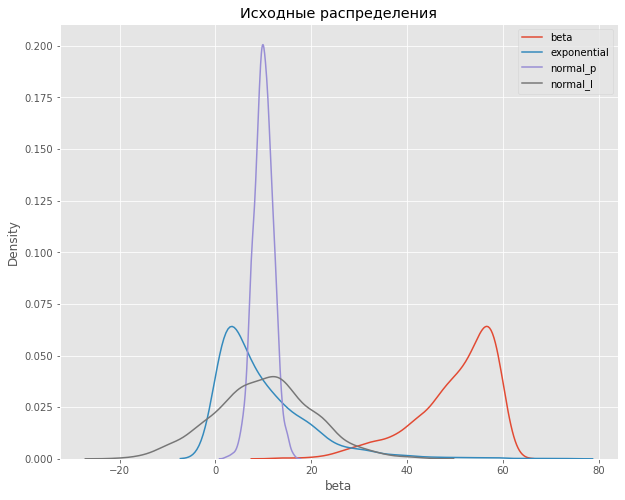

In [5]:
#Рассмотрим распределения на графике. 
#Метод визуализации kdeplot() — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности. 

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные величины. Попробуем нормализовать их.
Зафиксируем описательные статистики до преобразований.

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


MINMAXSCALER

При применении нормализации методом MinMaxScaler все значения признаков будут преобразованы в диапазон [0,1], что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

1. Из каждого значения признака х вычитается минимальное значение этого признака
2. Результат вычитания делится разницу на между максимумом и минимумом признака:

No handles with labels found to put in legend.


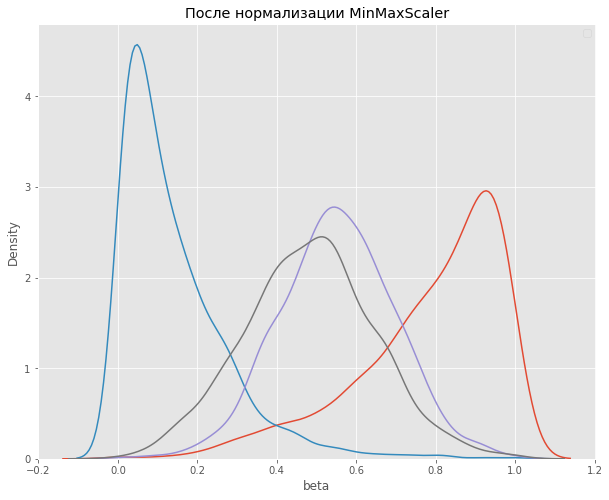

In [15]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [8]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


ROBUSTSCALER

1. из каждого значения признака вычитается медиана признака
2. полученное значение делится на межквартильный размах

<AxesSubplot:title={'center':'Рапсределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

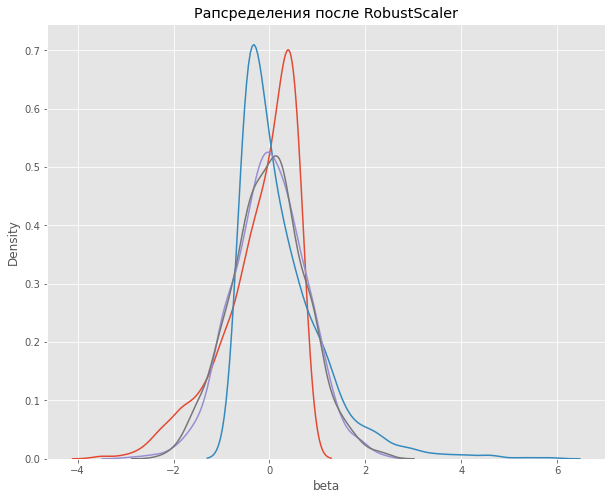

In [13]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

В ЧЁМ РАЗНИЦА?

Поскольку MinMaxScaler использует в своём вычислении минимальное и максимальное значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

RobustScaler в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

СТАНДАРТИЗАЦИЯ

Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

Этот процесс можно описать как центрирование данных с масштабированием. Сначала происходит вычитание среднего значения из всех данных — центрирование,  а затем деление на отклонение. 

Стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

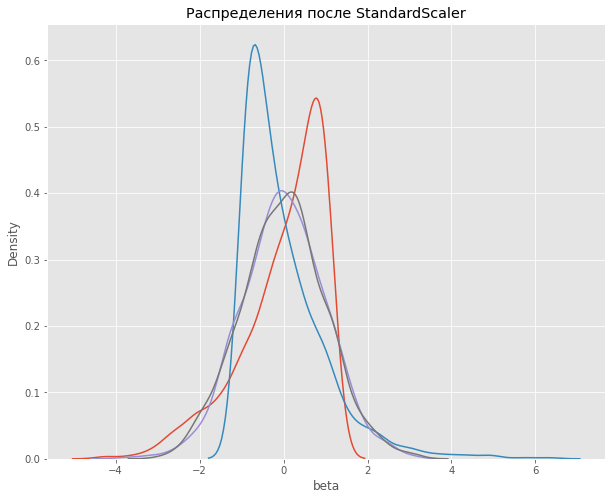

In [17]:
#Для стандартизации используем класс StandardScaler.

# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [18]:
#см. значение стандартного отклонения
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.206147e-16,-4.618528e-17,8.013035e-16,-1.704192e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


НОРМАЛИЗОВАТЬ ИЛИ СТАНДАРТИЗИРОВАТЬ?

Небольшая инструкция по преобразованию признаков:
1. если признак распределён нормально, то его необходимо стандартизировать;
2. если признак распределён ненормально, его необходимо нормализовать;
3. если разброс значений небольшой, то можно обойтись без преобразования данных.

Задание 6.4
Нормализуйте признак price. Используйте подходящий тип нормализации.
В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

In [82]:
r_scaler = preprocessing.RobustScaler()

data_array = np.array(data['price']).reshape(-1,1)
data_price_r = r_scaler.fit_transform(data_array)
data_price_r.sum().round()

#data_price = pd.DataFrame(data_price, columns=['price'])
#fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
#ax1.set_title('Распределения после RobustScaler')
#sns.kdeplot(data_price['price'], ax=ax1)

43501.0

Задание 6.5
Стандартизируйте исходный признак price.
В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

In [90]:
s_scaler = preprocessing.StandardScaler()

data_price_std = s_scaler.fit_transform(data_array)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
data_price_std = pd.DataFrame(data_price_std, columns=['price'])
data_price_std['price'][129968].round(2)


-0.14

### 7. Отбор признаков. Мультиколлинеарность

Отбор признаков — процесс выбора важных признаков, наиболее влияющих на предсказание.

Отбор признаков помогает:

1. Сократить время обучения. Чем меньше данных, тем быстрее обучается модель. Например, в скоринговых моделях часто количество признаков на этапе проектирования составляет больше 500, и дата-сайентисты делают отбор признаков, чтобы исключить те признаки, которые вносят наименьший вклад. В редких случаях количество признаков в модели может быть больше 100.

2. Повысить качество предсказания. Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют мультиколлинеарностью, которую мы изучим ниже.

Мультиколлинеарность — сильная корреляционная связь между признаками, отбираемыми для обучения. 

In [99]:
iris = pd.read_csv('/home/aleksandr/Документы/GitHub/data/Iris/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:>

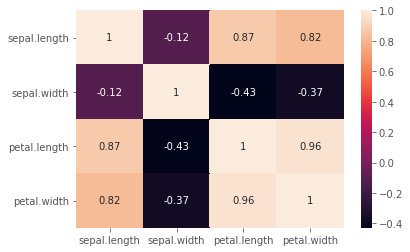

In [100]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

Чтобы построить модель на этом наборе данных, сделаем отбор признаков — удалим признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше).

In [101]:
#Удалим например petal.width, так как он коррелирует ещё и с признаком sepal.length
iris = iris.drop(['petal.width'], axis=1)

In [102]:
#Однако второй признак petal.length из этой пары также сильно коррелирует с признаком sepal.length. Удалим и его:
iris = iris.drop(['petal.length'], axis=1)

У нас осталось всего два признака с коэффициентом корреляции -0.12: sepal.width и sepal.length, и признак, который необходимо предсказать — variety. Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.

<AxesSubplot:>

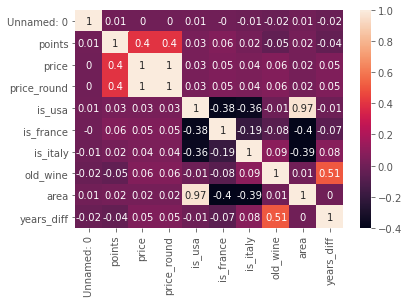

In [115]:
sns.heatmap(data.corr().round(2), annot=True) 

Задание 7.4
Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.
❗️ Удалять признак рейтинг — points нельзя!
❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.

<AxesSubplot:>

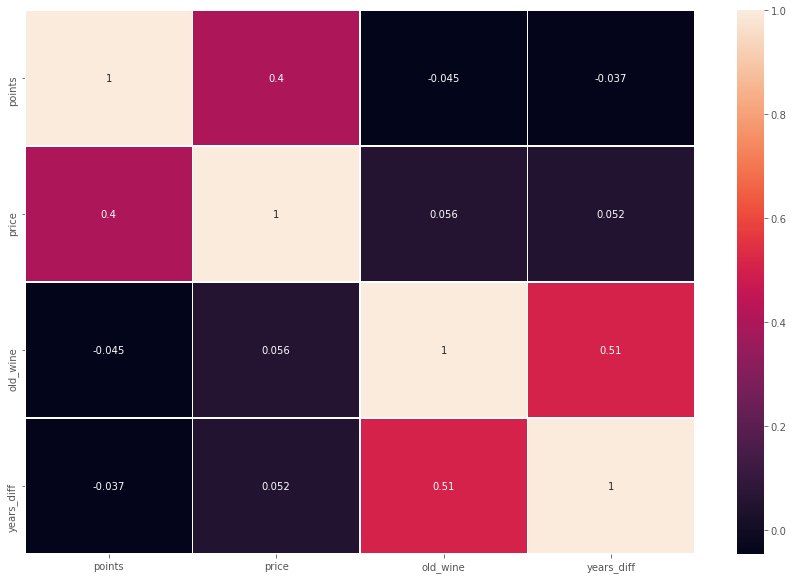

In [132]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
#sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

### 8. Проверка знаний

In [221]:
import pandas as pd
heart = pd.read_csv('/home/aleksandr/Документы/GitHub/data/Heart/heart.csv')
heart.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


age — возраст
sex — пол
cp — тип боли в груди (4 значения)
trestbps — артериальное давление в покое
chol — холестерин сыворотки в мг/дл
fbs — уровень сахара в крови натощак > 120 мг/дл
restecg — результаты электрокардиографии в покое (значения 0,1,2)
thalach — достигнута максимальная частота сердечных сокращений
exang — стенокардия, вызванная физической нагрузкой
oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
slope — наклон пикового сегмента ST при нагрузке
ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

Задание 8.1
Создайте новый признак old, где 1 — при возрасте пациента от 60 лет.
В ответ введите результат выполнения кода heart['old'].sum().

In [222]:
heart['old'] = heart['age'].apply(lambda x: 1 if x>60 else 0)
heart['old'].sum()

79

Задание 8.2
Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола.

In [223]:
#Решение 1:

def age_func_male(x):
        if x == 20:
            return '123/76'
        elif x in range(21, 31):
            return '126/79'
        elif x in range(31, 41):
            return '129/81'
        elif x in range(41, 51):
            return '135/83'
        elif x in range(51, 61):
            return '142/85'
        elif x> 61:
           return '142/80'
       
def age_func_female(x):
        if x == 20:
            return '116/72'
        elif x> 20 and x<=30:
            return '120/75'
        elif x> 30 and x<=40:
            return '127/80'
        elif x> 40 and x<=50:
            return '137/84'
        elif x> 50 and x<=60:
            return '144/85'
        elif x> 61:
           return '169/85'
       
heart['trestbps_mean_male'] = heart[heart['sex']==1]['age'].apply(age_func_male)
heart['trestbps_mean_female'] = heart[heart['sex']==0]['age'].apply(age_func_female)
heart['trestbps_mean'] = heart['trestbps_mean_male'].fillna('') + heart['trestbps_mean_female'].fillna('')
heart = heart.drop(['trestbps_mean_male', 'trestbps_mean_female'], axis=1)
heart['trestbps_mean'][300]

'142/80'

In [169]:
#Решение 2:

def norm_bps(row):
    #print(row['age'], row['sex'])
    lst_norm_bps = []
    lst_norm_bps.append(['116/72', '120/75', '127/80', '137/84', '144/85', '169/85']) # female
    lst_norm_bps.append(['123/76', '126/79', '129/81', '135/83', '142/85', '142/80']) # male
    if row['age'] <= 20:
        return lst_norm_bps[int(row['sex'])][0]
    elif row['age'] in range(21, 31):
        return lst_norm_bps[int(row['sex'])][1]
    elif row['age'] in range(31, 41):
        return lst_norm_bps[int(row['sex'])][2]
    elif row['age'] in range(41, 51):
        return lst_norm_bps[int(row['sex'])][3]
    elif row['age'] in range(51, 61):
        return lst_norm_bps[int(row['sex'])][4]
    elif row['age'] > 60:
        return lst_norm_bps[int(row['sex'])][5]      

heart['trestbps_mean'] = heart.apply(norm_bps, axis=1)
#heart.loc[300]

Задание 8.5
Раскодируйте вышеперечисленные признаки методом OneHotEncoding без удаления исходных признаков. Сколько признаков получилось в датасете?

In [224]:
#Закодируем признак type в Python. 
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'], use_cat_names=False) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, type_bin], axis=1)

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


Задание 8.6
Нормализуйте все числовые признаки подходящим способом. В ответе напишите стандартное отклонение признака chol без округления.

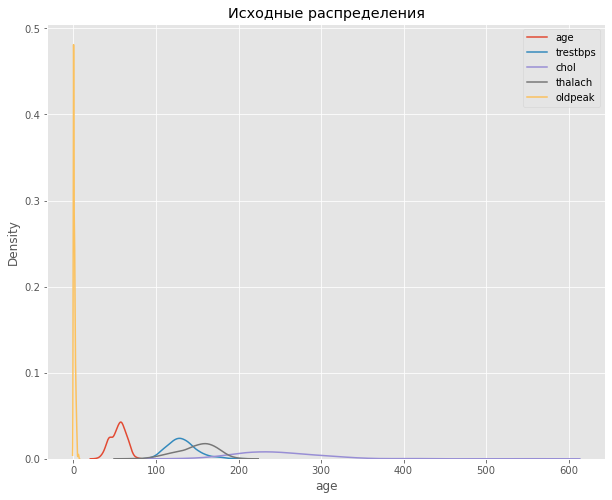

In [193]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

sns.kdeplot(heart['age'], ax=ax1, label ='age')
sns.kdeplot(heart['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart['oldpeak'], ax=ax1, label ='oldpeak')
plt.legend()

In [201]:
heart['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='age', ylabel='Density'>

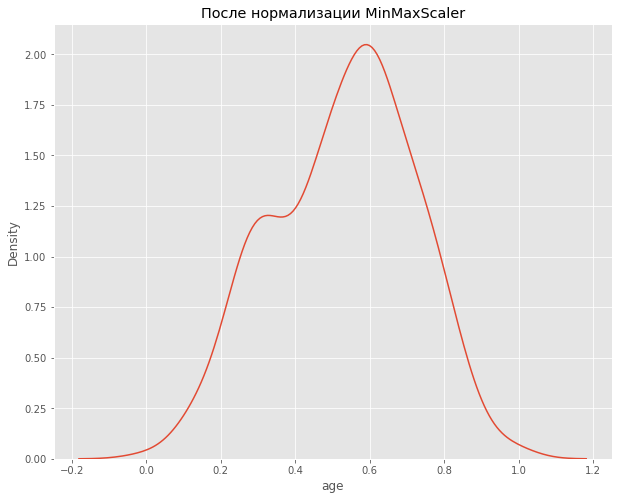

In [212]:
col_names = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
mm_scaler = preprocessing.MinMaxScaler()
heart_mm = mm_scaler.fit_transform(heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_mm = pd.DataFrame(heart_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(heart_mm['age'], ax=ax1)
#sns.kdeplot(heart_mm['trestbps'], ax=ax1)
#sns.kdeplot(heart_mm['chol'], ax=ax1)
#sns.kdeplot(heart_mm['thalach'], ax=ax1)
#sns.kdeplot(heart_mm['oldpeak'], ax=ax1)

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='age', ylabel='Density'>

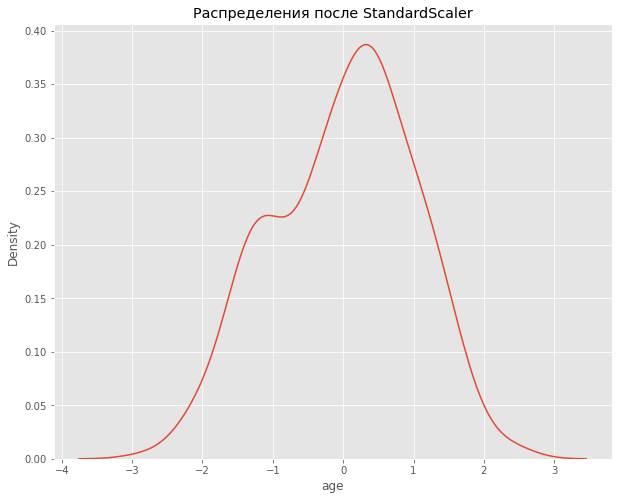

In [213]:
s_scaler = preprocessing.StandardScaler()
heart_s = s_scaler.fit_transform(heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_s = pd.DataFrame(heart_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(heart_s['age'], ax=ax1)
#sns.kdeplot(heart_s['trestbps'], ax=ax1)
#sns.kdeplot(heart_s['chol'], ax=ax1)
#sns.kdeplot(heart_s['thalach'], ax=ax1)
#sns.kdeplot(heart_s['oldpeak'], ax=ax1)

<AxesSubplot:title={'center':'Распределения после RobustScaler'}, xlabel='age', ylabel='Density'>

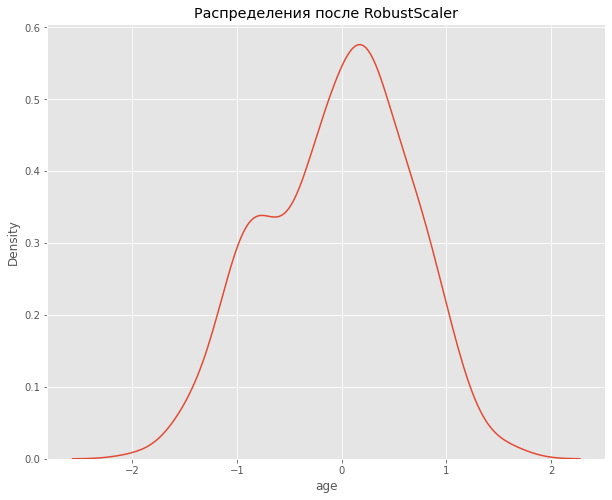

In [214]:
r_scaler = preprocessing.RobustScaler()
heart_r = r_scaler.fit_transform(heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

heart_r = pd.DataFrame(heart_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(heart_r['age'], ax=ax1)
#sns.kdeplot(heart_r['trestbps'], ax=ax1)
#sns.kdeplot(heart_r['chol'], ax=ax1)
#sns.kdeplot(heart_r['thalach'], ax=ax1)
#sns.kdeplot(heart_r['oldpeak'], ax=ax1)

<AxesSubplot:>

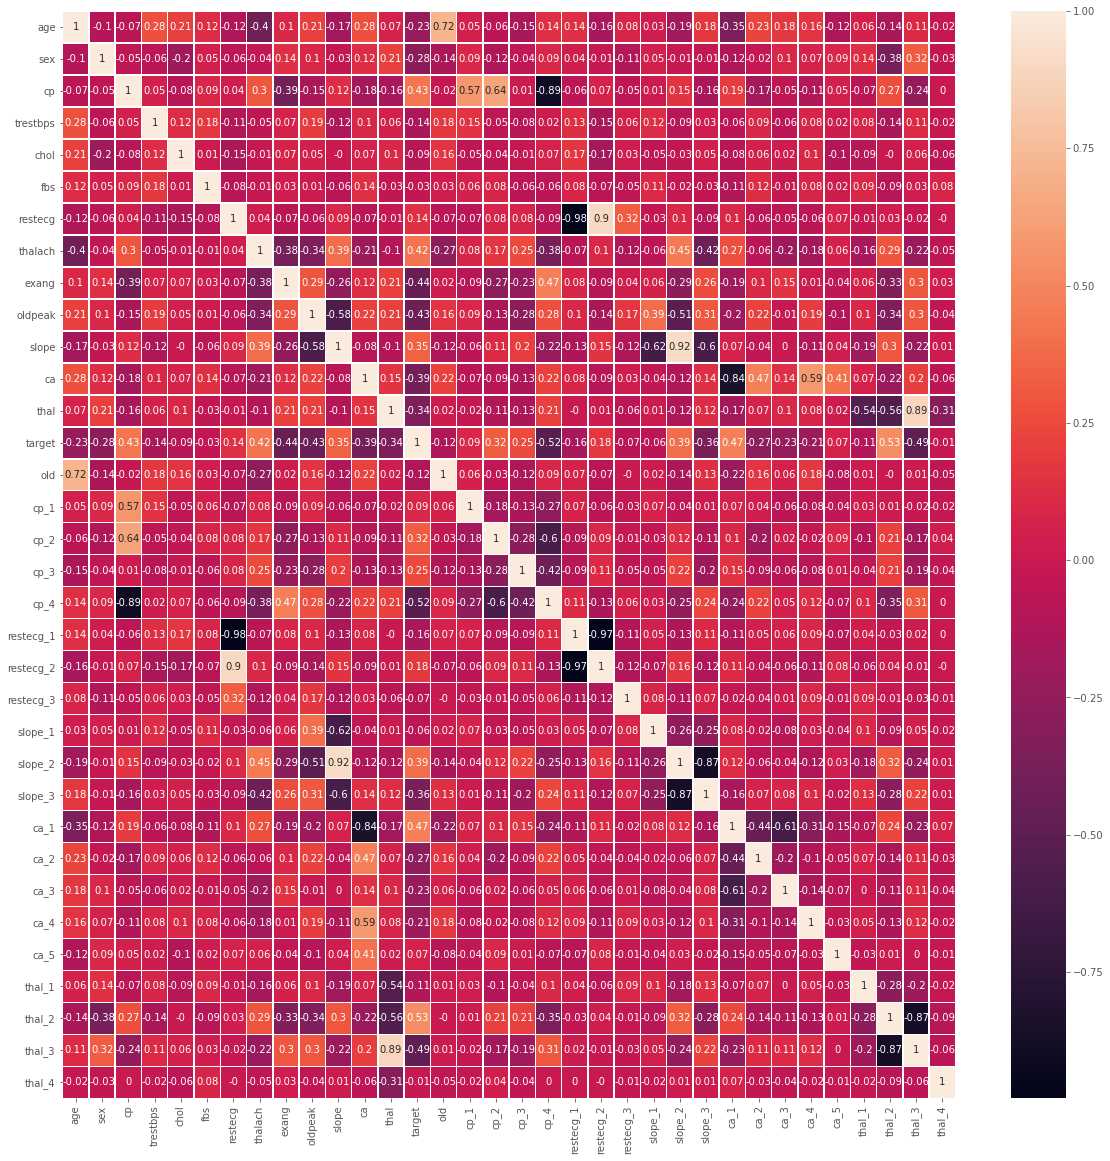

In [225]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(heart.corr().round(2), annot=True, linewidths=.5, ax=ax)